Consider the following Markov chain. \\
    • The state space $S = \{S^{1} , S^{2} , · · · , S^{50}\}$, where the cardinality of the state space is 50. \\
    • The transition probability is given by \\
$P(S_1|S_1) = 1/2, P(S_2|S_1) = 1/2$ \\
$P(S_{50}|S_{50}) = 1/2, P(S_{49} |S_{50}) = 1/2$ \\
$P(S_{i−1}|S_{i}) = 1/3, P(S_{i}|S_{i}) = 1/3, P(S_{i+1}|S_{i}) = 1/3$, for 2 ≤ i ≤ 49. \\

(a) Obtain the stationary distribution of this Markov chain by solving the stationarity equation: \\
$p = Pp$, \\
where $p = [p_1 , · · · , p_{50} ]^\intercal$ is the stationary distribution vector, and P is the transition
probability matrix of which (i, j) element $P_{ij} = P (S_{i} |S_{j}).$

In [60]:
import numpy as np
import scipy.linalg as la

In [61]:
P = np.zeros((50,50))

In [62]:
P[0,0] = 1/2
P[1,0] = 1/2
P[49,49] = 1/2
P[48,49] = 1/2

In [63]:
for i in range(1,49):
    P[i-1,i] = 1/3
    P[i,i] = 1/3
    P[i+1,i] = 1/3
print(P)

[[0.5        0.33333333 0.         ... 0.         0.         0.        ]
 [0.5        0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.5       ]
 [0.         0.         0.         ... 0.         0.33333333 0.5       ]]


In [5]:
#x = la.solve(P - np.identity(50), np.zeros(50))
#x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=7.9891e-17): result may not be accurate.
  """Entry point for launching an IPython kernel.


array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

The above method counld not work becuase $I-P$ is the singular matrix.

In [70]:
eigvals, eigvecs = la.eig(P)
eigvals[37]

In [ ]:
sum = 0
for i in eigvecs[:,37]:
    sum += i
sum

In [98]:
p = eigvecs[:,37]/sum # Be careful! eigves[37] is not corresponding e-vectors to e-values

array([0.01351351, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.01351351])

(b) Now, set $p_0 = [1, 0, 0, · · · , 0]$ and use iteration: \\
$p_n = Pp_{n−1}, n = 1, 2, · · ·$ \\
Draw $p_{n}$ for each n in a figure, where the x-axis represents state index and the y-axis represent its stationary probability value. What do you observe as n increases? Compare this with the result in Problem (a).

array([0.01352161, 0.02028238, 0.0202823 , 0.02028217, 0.02028199,
       0.02028176, 0.02028149, 0.02028117, 0.02028081, 0.0202804 ,
       0.02027996, 0.02027947, 0.02027895, 0.02027839, 0.0202778 ,
       0.02027718, 0.02027653, 0.02027585, 0.02027515, 0.02027444,
       0.0202737 , 0.02027295, 0.0202722 , 0.02027143, 0.02027066,
       0.02026988, 0.02026911, 0.02026835, 0.02026759, 0.02026684,
       0.0202661 , 0.02026539, 0.02026469, 0.02026401, 0.02026336,
       0.02026274, 0.02026215, 0.02026159, 0.02026107, 0.02026058,
       0.02026014, 0.02025973, 0.02025937, 0.02025905, 0.02025878,
       0.02025855, 0.02025837, 0.02025824, 0.02025816, 0.01350542])

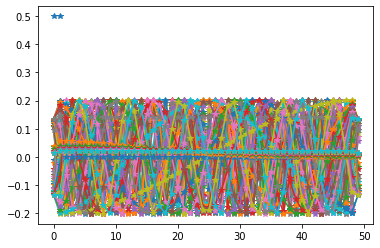

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure and an axes.
fig = plt.figure()
plt.plot(p, label='p=Pp', marker = '*')
p_0 = np.zeros(50)
p_0[0] = 1
inf_P = np.identity(50)
for i in range(6000):
    inf_P = inf_P @ P
    if i % 300 == 0:
        plt.plot(inf_P @ p_0 ,'*')


stationary_p = inf_P @ p_0
stationary_p